In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
%matplotlib inline

In [2]:
#Cost function for the linear regression
def costFunction(theta,xs,y):
    J = 0.
    for i in range(1,len(y)):
        J = J + (1/(2*len(y)))*((np.dot(xs,theta)-y[i]))**2
        return J

In [3]:
#Function to get the proper values of theta using gradient descent algorithm
def gradientDescent(xs, y, theta, alpha, m, iterations):
    xTrans = xs.transpose()
    for i in range(0, iterations):
        hypothesis = np.dot(xs, theta)
        loss = hypothesis - y
        #cost = np.sum(loss ** 2) / (2 * m)
        #print("Iteration %d | Cost: %f" % (i, cost))
        gradient = np.dot(xTrans, loss) / m
        theta = theta - alpha * gradient
    return theta

In [4]:
#Plot a line for the given slope and intercept
def drawLine(slope, intercept):
    axes = mpl.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    mpl.plot(x_vals, y_vals, 'g--')

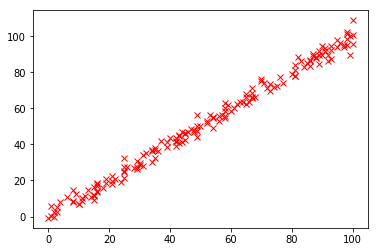

In [5]:
#Implementation according to the mathematical model
train_data=pd.read_csv("train.csv")
xs=pd.DataFrame({'x0':1.,'x':train_data.X})
x=train_data.X.values
y=train_data.Y.values
mpl.plot(x,y,'rx')

In [6]:
theta=pd.DataFrame({'theta':[0.]*2})
thetaT=theta.T
numIterations= 10000
m, n = np.shape(xs)
alpha = 0.0005
theta = np.ones(n)
theta = gradientDescent(xs, y, theta, alpha, m, numIterations)

[0.43979125 0.99539474]


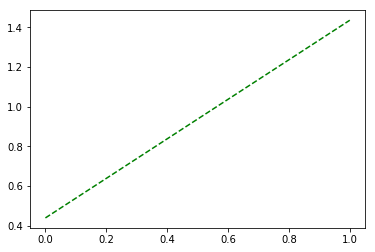

In [7]:
print(theta)
drawLine(theta[1],theta[0])

In [8]:
 test_data=pd.read_csv("test.csv")
xstest=pd.DataFrame({'x0':1.,'x':test_data.X})
m, n = np.shape(xstest)
xtest=test_data.X.values
ytest=test_data.Y.values
ycompute=np.dot(xstest,theta)
loss=ycompute-ytest
print("Average error in the test data is %f"%np.mean(loss))

Average error in the test data is 0.356289
